In [3]:
!pip install seaborn
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3990 files belonging to 3 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 853 files belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()

In [8]:
import tensorflow as tf

# Define the Sequential model
cnn = tf.keras.Sequential()

# Add the input layer using Input object
cnn.add(tf.keras.Input(shape=[128,128,3]))

# Add the convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Add the pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [21]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [22]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [23]:
cnn.add(tf.keras.layers.Dense(3,activation='softmax'))

In [24]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [25]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1500)           │     2,251,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,041,727 (38.31 MB)

 Trainable params: 10,041,727 (38.31 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.4699 - loss: 1.0055 - val_accuracy: 0.7726 - val_loss: 0.5024
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8361 - loss: 0.4160 - val_accuracy: 0.9508 - val_loss: 0.1470
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9398 - loss: 0.1721 - val_accuracy: 0.9695 - val_loss: 0.0910
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.9515 - loss: 0.1262 - val_accuracy: 0.9754 - val_loss: 0.0839
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9595 - loss: 0.1195 - val_accuracy: 0.9824 - val_loss: 0.0534
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9802 - loss: 0.0613 - val_accuracy: 0.9848 - val_loss: 0.0555
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.9832 - loss: 0.0402 - val_accuracy: 0.9496 - val_loss: 0.1362
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.9776 - loss: 0.0644 - val_accu

In [27]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 355ms/step - accuracy: 0.9986 - loss: 0.0045
Training accuracy: 0.9989975094795227


In [28]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 345ms/step - accuracy: 0.9892 - loss: 0.0290
Validation accuracy: 0.9929659962654114


In [43]:

cnn.save('models/animesh.keras')

In [44]:

training_history.history #Return Dictionary of history

{'accuracy': [0.591478705406189,
  0.8578947186470032,
  0.9483709335327148,
  0.9548872113227844,
  0.9696741700172424,
  0.9744361042976379,
  0.9794486165046692,
  0.9814536571502686,
  0.9804511070251465,
  0.9939849376678467],
 'loss': [0.8093962669372559,
  0.3728800117969513,
  0.14701303839683533,
  0.11561492085456848,
  0.0866713598370552,
  0.07498261332511902,
  0.05381343141198158,
  0.04990918189287186,
  0.05858524516224861,
  0.01663338579237461],
 'val_accuracy': [0.7725673913955688,
  0.9507620334625244,
  0.969519317150116,
  0.9753810167312622,
  0.9824150204658508,
  0.9847596883773804,
  0.9495896697044373,
  0.991793692111969,
  0.9871043562889099,
  0.9929659962654114],
 'val_loss': [0.5024304986000061,
  0.1470072865486145,
  0.09104642271995544,
  0.0838596299290657,
  0.05343940854072571,
  0.05552862212061882,
  0.13620081543922424,
  0.03193803131580353,
  0.04072555527091026,
  0.020653530955314636]}

In [45]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [46]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


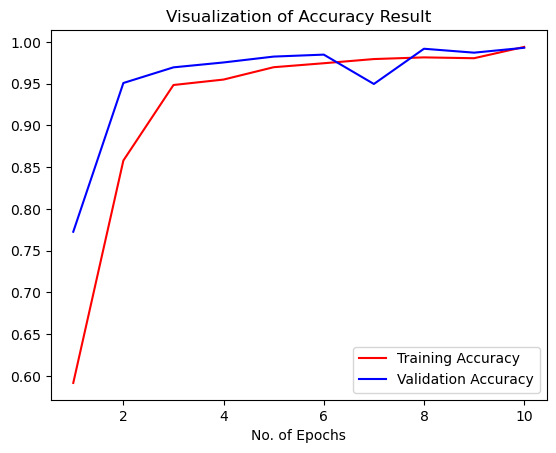

In [47]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [48]:

class_name = validation_set.class_names

In [49]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 853 files belonging to 3 classes.


In [50]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

853/853 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step


In [51]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [53]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

Potato___Early_blight       0.99      1.00      0.99       290
 Potato___Late_blight       0.99      0.99      0.99       290
     Potato___healthy       1.00      0.99      0.99       273

             accuracy                           0.99       853
            macro avg       0.99      0.99      0.99       853
         weighted avg       0.99      0.99      0.99       853

